In [1]:
from pandas import read_excel
from pandas import DataFrame
from pandas import merge
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

# 모델을 구성하기위한 객체
from tensorflow.keras.models import Sequential
# 모델에 학습층을 쌓기 위한 클래스
from tensorflow.keras.layers import Dense
# 데이터를 훈련용과 테스트용으로 나누는 기능
from sklearn.model_selection import train_test_split

# 학습에 대한 콜백함수 처리용 패키지 참조
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint

# 표준화 처리 패키지
from sklearn.preprocessing import StandardScaler
# (신규) 분류결과 평가 지표 관련 패키지
from sklearn.metrics import classification_report, confusion_matrix

# 회귀분석을 수행하는 통계 패키지 (머신러닝과는 연관 없음)
from statsmodels.formula.api import logit

from sklearn.decomposition import PCA # 주성분 분석용 패키지
from pca import pca # 주성분 분석 결

In [2]:
np.random.seed(777)

In [3]:
df = read_excel('http://itpaper.co.kr/data/diabetes.xlsx', engine='openpyxl')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [4]:
# 결측치 확인
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# 데이터 형태 확인
# Outcome이 0 과 1로 표현되어 있고, 숫자형으로 나타나 있기 때문에 따로 전처리를 수행하지 않아도 된다.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
# 독립변수와 종속변수 분류
x_train_set = df.filter(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI','DiabetesPedigreeFunction','Age'])
y_train_set = df.filter(['Outcome'])
print("훈련데이터 크기:", x_train_set.shape, "/ 레이블 크기:", y_train_set.shape)
x_train_set

훈련데이터 크기: (768, 8) / 레이블 크기: (768, 1)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [8]:
# 훈련데이터와 테스트 데이터 분류
x_train, x_test, y_train, y_test = train_test_split(x_train_set, y_train_set, test_size=0.33, random_state=777)
print("훈련용 데이터셋 크기: %d, 검증용 데이터셋 크기: %d" % (len(x_train), len(x_test)))

훈련용 데이터셋 크기: 514, 검증용 데이터셋 크기: 254


In [9]:
# 각 파라미터들의 단위와 값차이가 심하므로 표준화를 진행한다.

scaler = StandardScaler()
std_x_train = DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
std_x_test = DataFrame(scaler.transform(x_test), columns=x_test.columns)
std_x_train.head()
std_x_test.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1.299394,-0.530714,1.565425,0.969865,-0.691853,1.472340,-0.694806,1.011812
1,1.606328,1.483601,2.072022,0.215879,1.339058,1.743135,0.760121,1.779634
2,1.299394,2.277119,0.248272,-1.292094,-0.691853,-0.771393,2.178826,0.499931
3,0.071658,-0.835914,0.045633,0.718536,-0.691853,0.028098,0.431102,-0.779772
4,0.685526,-0.957993,-3.500548,-1.292094,-0.691853,-0.268487,0.096047,-0.182578


### 주성분 분석을 통해 유효한 독립변수를 뽑아낸다

In [10]:
model = pca(n_components=len(x_train.columns))
fit = model.fit_transform(std_x_train)
fit['topfeat']

[pca] >Processing dataframe..
[pca] >The PCA reduction is performed on the [8] columns of the input dataframe.
[pca] >Fitting using PCA..
[pca] >Computing loadings and PCs..
[pca] >Computing explained variance..
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[8]
[pca] >Outlier detection using SPE/DmodX with n_std=[2]


,PC,feature,loading,type
0,PC1,BMI,0.450364,best
1,PC2,Age,0.621726,best
2,PC3,BloodPressure,-0.488365,best
3,PC4,DiabetesPedigreeFunction,0.799704,best
4,PC5,SkinThickness,-0.474113,best
5,PC6,BloodPressure,-0.702661,best
6,PC7,Age,0.720133,best
7,PC8,SkinThickness,0.591623,best
8,PC7,Pregnancies,-0.614457,weak
9,PC4,Glucose,-0.507498,weak


In [11]:
pca_x_train = std_x_train.drop(['Pregnancies','Glucose','Insulin'], axis=1)
pca_x_test = std_x_test.drop(['Pregnancies','Glucose','Insulin'], axis=1)

In [36]:
# 모델 설정
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(len(std_x_test.columns), )))
model.add(Dense(8, activation='relu', input_shape=(len(std_x_test.columns), )))
model.add(Dense(4, activation='relu', input_shape=(len(std_x_test.columns), )))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='rmsprop', loss = 'binary_crossentropy', metrics = ['acc'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 16)                144       
_________________________________________________________________
dense_3 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 5         
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [37]:
# 학습
result = model.fit(std_x_train, y_train, epochs = 500, validation_data = (std_x_test, y_test), callbacks = [
    #ModelCheckpoint(filepath = 'check_point.h5', monitor = 'val_loss', verbose=1, save_best_only = True),
    EarlyStopping(monitor = 'val_loss', patience=5, verbose = 1),
    ReduceLROnPlateau(monitor= "val_loss", patience=3, factor = 0.5, min_lr=0.0001, verbose=1)
])

result_df = DataFrame(result.history)
result_df['epochs'] = result_df.index+1
result_df.set_index('epochs', inplace=True)
result_df

Epoch 1/500
17/17 [==============================] - 1s 8ms/step - loss: 0.7143 - acc: 0.4377 - val_loss: 0.6769 - val_acc: 0.5630
Epoch 2/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6594 - acc: 0.5934 - val_loss: 0.6397 - val_acc: 0.6929
Epoch 3/500
17/17 [==============================] - ETA: 0s - loss: 0.6881 - acc: 0.562 - 0s 2ms/step - loss: 0.6371 - acc: 0.6498 - val_loss: 0.6245 - val_acc: 0.7165
Epoch 4/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6232 - acc: 0.6615 - val_loss: 0.6110 - val_acc: 0.7165
Epoch 5/500
17/17 [==============================] - 0s 2ms/step - loss: 0.6086 - acc: 0.6615 - val_loss: 0.5967 - val_acc: 0.7126
Epoch 6/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5943 - acc: 0.6809 - val_loss: 0.5835 - val_acc: 0.7008
Epoch 7/500
17/17 [==============================] - 0s 2ms/step - loss: 0.5803 - acc: 0.6907 - val_loss: 0.5683 - val_acc: 0.7126
Epoch 8/500
17/17 [==========================

,loss,acc,val_loss,val_acc,lr
epochs,,,,,
1,0.714267,0.437743,0.676886,0.562992,0.0010
2,0.659400,0.593385,0.639683,0.692913,0.0010
3,0.637129,0.649805,0.624469,0.716535,0.0010
4,0.623165,0.661479,0.611046,0.716535,0.0010
5,0.608580,0.661479,0.596736,0.712598,0.0010
6,0.594296,0.680934,0.583451,0.700787,0.0010
7,0.580288,0.690661,0.568337,0.712598,0.0010
8,0.565519,0.694553,0.555122,0.724409,0.0010
9,0.551468,0.708171,0.543222,0.755906,0.0010


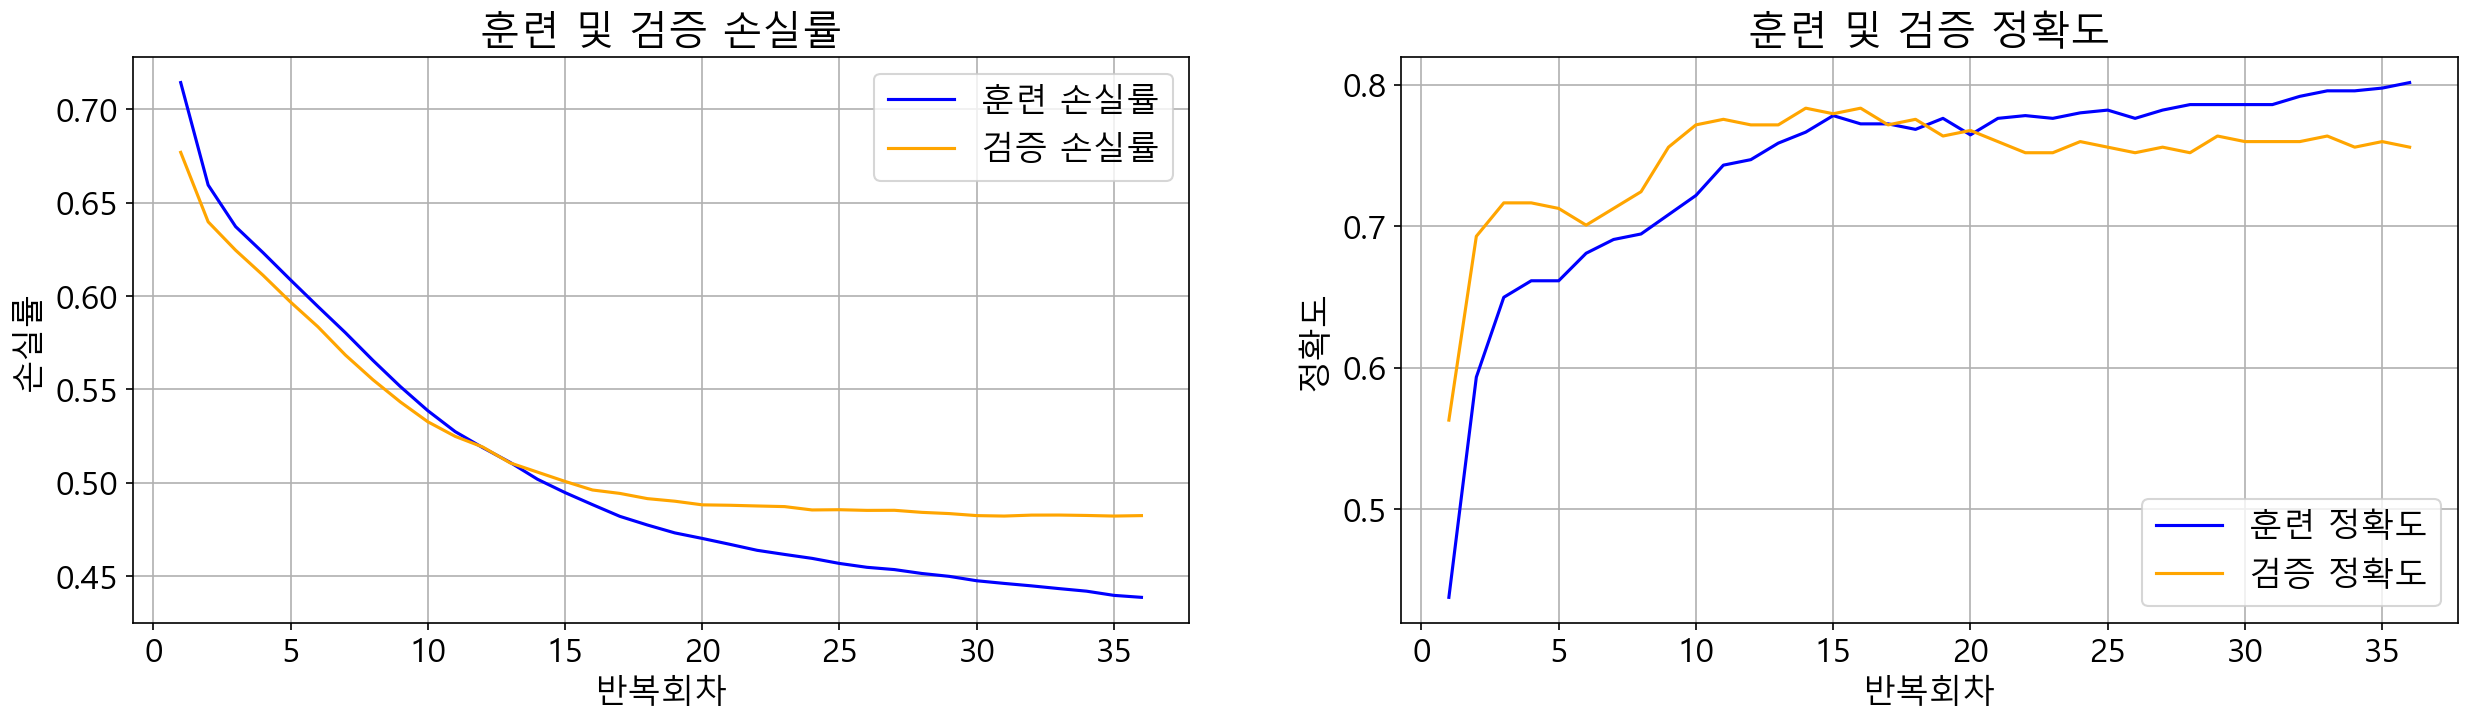

In [38]:
# 그래프 기본 설정
# ----------------------------------------
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams['axes.unicode_minus'] = False

# 그래프를 그리기 위한 객체 생성
# ----------------------------------------
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 5), dpi=150)

# 1) 훈련 및 검증 손실 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='loss', data=result_df, color='blue', label='훈련 손실률', ax=ax1)
sns.lineplot(x=result_df.index, y='val_loss', data=result_df, color='orange', label='검증 손실률', ax=ax1)
ax1.set_title('훈련 및 검증 손실률')
ax1.set_xlabel('반복회차')
ax1.set_ylabel('손실률')
ax1.grid()
ax1.legend()

# 2) 훈련 및 검증 정확도 그리기
# ----------------------------------------
sns.lineplot(x=result_df.index, y='acc', data=result_df, color = 'blue', label = '훈련 정확도', ax=ax2)
sns.lineplot(x=result_df.index, y='val_acc', data=result_df, color = 'orange', label = '검증 정확도', ax=ax2)
ax2.set_title('훈련 및 검증 정확도')
ax2.set_xlabel('반복회차')
ax2.set_ylabel('정확도')
ax2.grid()
ax2.legend()

plt.show()
plt.close()

In [39]:
results = model.predict(std_x_test)
data_count, case_count = results.shape
print("%d개의 검증 데이터가 %d개의 경우의 수를 갖는다." % (data_count, case_count))
print(results)

254개의 검증 데이터가 1개의 경우의 수를 갖는다.
[[5.14261603e-01]
 [7.92724371e-01]
 [8.76200676e-01]
 [2.16644406e-01]
 [2.09928334e-01]
 [6.40454888e-01]
 [4.94238257e-01]
 [7.29101598e-02]
 [8.35052729e-01]
 [1.18233979e-01]
 [6.61603510e-02]
 [9.29819047e-02]
 [3.00911665e-02]
 [2.11789906e-02]
 [3.16962689e-01]
 [5.11153638e-02]
 [1.22403681e-01]
 [3.07990491e-01]
 [7.07610607e-01]
 [1.40707284e-01]
 [8.76155198e-02]
 [5.04150212e-01]
 [8.59277129e-01]
 [6.84041500e-01]
 [1.99397743e-01]
 [2.24955618e-01]
 [2.96134055e-02]
 [7.50776887e-01]
 [7.54613578e-02]
 [5.36608219e-01]
 [1.04175150e-01]
 [8.38215053e-02]
 [2.86916792e-01]
 [1.84377432e-02]
 [2.04011232e-01]
 [1.70697570e-02]
 [2.72245765e-01]
 [2.77572632e-01]
 [6.49562716e-01]
 [7.92327523e-03]
 [1.29150659e-01]
 [2.46169627e-01]
 [2.32024193e-02]
 [8.51838589e-01]
 [7.07968950e-01]
 [1.08602047e-02]
 [1.19321615e-01]
 [1.42839372e-01]
 [3.65872085e-02]
 [6.97475672e-02]
 [7.95877337e-01]
 [2.71239579e-02]
 [2.30725408e-02]
 [2.73336709e-01

In [40]:
f_results = results.flatten()
f_results

array([5.14261603e-01, 7.92724371e-01, 8.76200676e-01, 2.16644406e-01,
       2.09928334e-01, 6.40454888e-01, 4.94238257e-01, 7.29101598e-02,
       8.35052729e-01, 1.18233979e-01, 6.61603510e-02, 9.29819047e-02,
       3.00911665e-02, 2.11789906e-02, 3.16962689e-01, 5.11153638e-02,
       1.22403681e-01, 3.07990491e-01, 7.07610607e-01, 1.40707284e-01,
       8.76155198e-02, 5.04150212e-01, 8.59277129e-01, 6.84041500e-01,
       1.99397743e-01, 2.24955618e-01, 2.96134055e-02, 7.50776887e-01,
       7.54613578e-02, 5.36608219e-01, 1.04175150e-01, 8.38215053e-02,
       2.86916792e-01, 1.84377432e-02, 2.04011232e-01, 1.70697570e-02,
       2.72245765e-01, 2.77572632e-01, 6.49562716e-01, 7.92327523e-03,
       1.29150659e-01, 2.46169627e-01, 2.32024193e-02, 8.51838589e-01,
       7.07968950e-01, 1.08602047e-02, 1.19321615e-01, 1.42839372e-01,
       3.65872085e-02, 6.97475672e-02, 7.95877337e-01, 2.71239579e-02,
       2.30725408e-02, 2.73336709e-01, 2.24088460e-01, 9.49302018e-02,
      

In [41]:
kdf = DataFrame({
    '결과값': y_test['Outcome'],
    '정상도착확률(%)': np.round(f_results * 100, 1),
    '예측치' : np.round(f_results)
})

kdf

,결과값,정상도착확률(%),예측치
387,1,51.400002,1.0
43,1,79.300003,1.0
408,1,87.599998,1.0
262,0,21.700001,0.0
533,0,21.000000,0.0
...,...,...,...
288,0,3.800000,0.0
310,0,9.900000,0.0
226,0,4.900000,0.0
454,0,22.400000,0.0


In [42]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기 
cm = confusion_matrix(kdf['결과값'], kdf['예측치'])
cmdf1 = DataFrame(cm, columns=['예측값(P)', '예측값(N)'], index=['실제값(P)', '실제값(N)'])
cmdf1

,예측값(P),예측값(N)
실제값(P),145,30
실제값(N),32,47


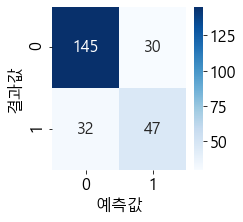

In [43]:
plt.rcParams["font.family"] = 'Malgun Gothic'
plt.rcParams["font.size"] = 16
plt.rcParams["figure.figsize"] = (3, 3)

# 오차 행렬을 히트맵 그래프로 표현
# -> annot : 그래프의 각 칸에 수치값 출력
# -> fmt : 수치값 출력 format (여기서는 10진수)
# -> cmap : 색상맵 (https://matplotlib.org/3.2.1/tutorials/colors/colormaps.html)
sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
plt.xlabel('예측값')
plt.ylabel('결과값')
plt.show()

## 혼동행렬과 히트맵을 확인해본 결과 당뇨에 걸린것을 예측하기가 더욱 힘듬을 알 수 있다.

## 분류 보고서

In [44]:
report = classification_report(kdf['결과값'], kdf['예측치'])
print(report)

              precision    recall  f1-score   support

           0       0.82      0.83      0.82       175
           1       0.61      0.59      0.60        79

    accuracy                           0.76       254
   macro avg       0.71      0.71      0.71       254
weighted avg       0.75      0.76      0.76       254



In [45]:
from pandas import merge
train_df = merge(x_train, y_train, left_index=True, right_index=True)
train_df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
667,10,111,70,27,0,27.5,0.141,40,1
634,10,92,62,0,0,25.9,0.167,31,0
65,5,99,74,27,0,29.0,0.203,32,0
63,2,141,58,34,128,25.4,0.699,24,0
106,1,96,122,0,0,22.4,0.207,27,0
...,...,...,...,...,...,...,...,...,...
669,9,154,78,30,100,30.9,0.164,45,0
71,5,139,64,35,140,28.6,0.411,26,0
599,1,109,38,18,120,23.1,0.407,26,0
571,2,130,96,0,0,22.6,0.268,21,0


In [46]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 514 entries, 667 to 103
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               514 non-null    int64  
 1   Glucose                   514 non-null    int64  
 2   BloodPressure             514 non-null    int64  
 3   SkinThickness             514 non-null    int64  
 4   Insulin                   514 non-null    int64  
 5   BMI                       514 non-null    float64
 6   DiabetesPedigreeFunction  514 non-null    float64
 7   Age                       514 non-null    int64  
 8   Outcome                   514 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.3 KB


In [47]:
model = logit('Outcome ~ Pregnancies+Glucose+BloodPressure+SkinThickness+Insulin+BMI+DiabetesPedigreeFunction+Age', data=train_df)
fit = model.fit()
print(fit.summary())

Optimization terminated successfully.
         Current function value: 0.466406
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                Outcome   No. Observations:                  514
Model:                          Logit   Df Residuals:                      505
Method:                           MLE   Df Model:                            8
Date:                Fri, 09 Jul 2021   Pseudo R-squ.:                  0.2909
Time:                        15:46:32   Log-Likelihood:                -239.73
converged:                       True   LL-Null:                       -338.07
Covariance Type:            nonrobust   LLR p-value:                 3.207e-38
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -9.2308      0.962     -9.600      0.000     -11.115

In [48]:
from pandas import merge
test_df = merge(x_test, y_test, left_index=True, right_index=True)
test_df
pred2 = fit.predict(test_df)
pred2

387    0.501598
43     0.958689
408    0.935430
262    0.168875
533    0.272556
         ...   
288    0.048515
310    0.068697
226    0.102387
454    0.248860
358    0.406246
Length: 254, dtype: float64

In [49]:
kdf['통계치'] = np.round(pred2.values)
kdf

,결과값,정상도착확률(%),예측치,통계치
387,1,51.400002,1.0,1.0
43,1,79.300003,1.0,1.0
408,1,87.599998,1.0,1.0
262,0,21.700001,0.0,0.0
533,0,21.000000,0.0,0.0
...,...,...,...,...
288,0,3.800000,0.0,0.0
310,0,9.900000,0.0,0.0
226,0,4.900000,0.0,0.0
454,0,22.400000,0.0,0.0


In [50]:
# 예측 데이터(ca_y_test)를 x축으로, 결과 데이터(results)를 y축으로 놓는 오차행렬(confusion_matrix) 생성하기 
cm = confusion_matrix(kdf['결과값'], kdf['통계치'])
cmdf2 = DataFrame(cm, columns=['예측값(P)', '예측값(N)'], index=['실제값(P)', '실제값(N)'])
cmdf2

,예측값(P),예측값(N)
실제값(P),150,25
실제값(N),36,43


In [51]:
x = (cmdf1['예측값(P)']['실제값(P)']+cmdf1['예측값(N)']['실제값(N)']) / len(y_test)
y = (cmdf2['예측값(P)']['실제값(P)']+cmdf2['예측값(N)']['실제값(N)']) / len(y_test)
print('머신러닝 분류 정확도 : %0.2f%%, 통계 분류 정확도 : %0.2f%%' % (x, y))

머신러닝 분류 정확도 : 0.76%, 통계 분류 정확도 : 0.76%


### 머신러닝의 분류도가 통계 분류도보다 1% 더 높은 값이 나왔다.